In [1]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from datetime import date, datetime

In [3]:
det = pd.read_excel(r"C:\Users\samas\Downloads\det_epsus.xlsx")
fundq = pd.read_csv(r"C:\Users\samas\Downloads\fundq.csv")

In [4]:
fundq['rdq_date'] = pd.to_datetime(fundq['rdq'], format='%Y%m%d')
fundq['rdq_date_1'] = pd.to_datetime(fundq['rdq_date'])

In [9]:
det.set_index(["ANALYS", "TICKER"])

ANNDATS  FPI    FPEDATS  VALUE  ACTUAL
ANALYS TICKER                                          
115366 000V   2020-01-22    1 2019-12-31  -3.14   -3.08
       000V   2020-01-22    6 2019-12-31  -0.75   -0.68
188522 000V   2020-03-15    6 2020-03-31  -0.74   -0.62
105691 000V   2020-03-18    6 2020-03-31  -0.70   -0.62
71613  000V   2020-03-23    6 2020-03-31  -0.75   -0.62
...                  ...  ...        ...    ...     ...
191964 ZYNX   2020-04-29    1 2020-12-31   0.36    0.26
53136  ZYNX   2020-04-29    1 2020-12-31   0.41    0.26
118308 ZYNX   2020-04-29    1 2020-12-31   0.37    0.26
53136  ZYNX   2020-05-19    1 2020-12-31   0.40    0.26
191964 ZYNX   2020-05-29    1 2020-12-31   0.37    0.26

[199908 rows x 5 columns]

In [5]:
det.head()

,TICKER,ANNDATS,FPI,FPEDATS,ANALYS,VALUE,ACTUAL
0,000V,2020-01-22,1,2019-12-31,115366,-3.14,-3.08
1,000V,2020-01-22,6,2019-12-31,115366,-0.75,-0.68
2,000V,2020-03-15,6,2020-03-31,188522,-0.74,-0.62
3,000V,2020-03-18,6,2020-03-31,105691,-0.70,-0.62
4,000V,2020-03-23,6,2020-03-31,71613,-0.75,-0.62


In [6]:
fundq.head()

,gvkey,datadate,conm,rdq,atq,cshoq,cik,ticker,rdq_date,rdq_date_1
0,1045,20200331,AMERICAN AIRLINES GROUP INC,20200430,58580.00,422.887,6201,AMR,2020-04-30,2020-04-30
1,1075,20200331,PINNACLE WEST CAPITAL CORP,20200508,18561.76,112.492,764622,AZP,2020-05-08,2020-05-08
2,1078,20200331,ABBOTT LABORATORIES,20200416,66777.00,1768.845,1800,ABT,2020-04-16,2020-04-16
3,1161,20200331,ADVANCED MICRO DEVICES,20200428,5864.00,1171.000,2488,AMD,2020-04-28,2020-04-28
4,1230,20200331,ALASKA AIR GROUP INC,20200505,13363.00,122.585,766421,ALK,2020-05-05,2020-05-05


# Task 1

In [7]:
analysts_each_firm_unique = []
number_of_analyst = []
actual_eps_mar_2020 = []
last_quarterly_forecast_eps = []
last_quarterly_forecast_eps_mean = []
last_quarterly_forecast_eps_std = []
last_annual_forecast_eps = []
last_annual_forecast_eps_mean = []
last_annual_forecast_eps_std = []
first_annual_forecast_eps = []
first_annual_forecast_eps_mean = []
first_annual_forecast_eps_std = []
ticks = []
for idx, row in fundq.iterrows():
    if row['ticker'] in det['TICKER'].values:
        ticks.append(row['ticker'])
        df = det.loc[det['TICKER'] == row['ticker']]
        analysts_each_firm_unique.append(df['ANALYS'].unique())
        number_of_analyst.append(len(df['ANALYS'].unique()))
        actual_eps_mar_2020.append(df.loc[df['FPEDATS'] == '2020-03-31']['ACTUAL'].unique())
        last_quarterly_forecast_eps.append(df.loc[(df['ANNDATS'] >= pd.to_datetime(date(2020,1,1))) & (df['ANNDATS'] <= pd.to_datetime(date(2020,3,31))) & (df['FPI'] == 6) & (df['FPEDATS'] == pd.to_datetime(date(2020,3,31)))].groupby(by = ['ANALYS'])['ANNDATS', 'VALUE'].last()['VALUE'])
        last_quarterly_forecast_eps_mean.append(df.loc[(df['ANNDATS'] >= pd.to_datetime(date(2020,1,1))) & (df['ANNDATS'] <= pd.to_datetime(date(2020,3,31))) & (df['FPI'] == 6) & (df['FPEDATS'] == pd.to_datetime(date(2020,3,31)))].groupby(by = ['ANALYS'])['ANNDATS', 'VALUE'].last()['VALUE'].mean())
        last_quarterly_forecast_eps_std.append(df.loc[(df['ANNDATS'] >= pd.to_datetime(date(2020,1,1))) & (df['ANNDATS'] <= pd.to_datetime(date(2020,3,31))) & (df['FPI'] == 6) & (df['FPEDATS'] == pd.to_datetime(date(2020,3,31)))].groupby(by = ['ANALYS'])['ANNDATS', 'VALUE'].last()['VALUE'].std())
        last_annual_forecast_eps.append(df.loc[(df['ANNDATS'] >= pd.to_datetime(date(2020,1,1))) & (df['ANNDATS'] <= pd.to_datetime(date(2020,3,31))) & (df['FPI'] == 1) & (df['FPEDATS'] == pd.to_datetime(date(2020,12,31)))].groupby(by = ['ANALYS'])['ANNDATS', 'VALUE'].last()["VALUE"])
        last_annual_forecast_eps_mean.append(df.loc[(df['ANNDATS'] >= pd.to_datetime(date(2020,1,1))) & (df['ANNDATS'] <= pd.to_datetime(date(2020,3,31))) & (df['FPI'] == 1) & (df['FPEDATS'] == pd.to_datetime(date(2020,12,31)))].groupby(by = ['ANALYS'])['ANNDATS', 'VALUE'].last()["VALUE"].mean())
        last_annual_forecast_eps_std.append(df.loc[(df['ANNDATS'] >= pd.to_datetime(date(2020,1,1))) & (df['ANNDATS'] <= pd.to_datetime(date(2020,3,31))) & (df['FPI'] == 1) & (df['FPEDATS'] == pd.to_datetime(date(2020,12,31)))].groupby(by = ['ANALYS'])['ANNDATS', 'VALUE'].last()["VALUE"].std())
        first_annual_forecast_eps.append(df.loc[(df['ANNDATS'] >= row['rdq_date_1']) & (df['ANNDATS'] <= pd.to_datetime(date(2020,6,30))) & (df['FPEDATS'] == pd.to_datetime(date(2020,12,31))) & (df['FPI'] == 1)].groupby(by = ['ANALYS'])['ANNDATS', 'VALUE'].first()['VALUE'])
        first_annual_forecast_eps_mean.append(df.loc[(df['ANNDATS'] >= row['rdq_date_1']) & (df['ANNDATS'] <= pd.to_datetime(date(2020,6,30))) & (df['FPEDATS'] == pd.to_datetime(date(2020,12,31))) & (df['FPI'] == 1)].groupby(by = ['ANALYS'])['ANNDATS', 'VALUE'].first()['VALUE'].mean())
        first_annual_forecast_eps_std.append(df.loc[(df['ANNDATS'] >= row['rdq_date_1']) & (df['ANNDATS'] <= pd.to_datetime(date(2020,6,30))) & (df['FPEDATS'] == pd.to_datetime(date(2020,12,31))) & (df['FPI'] == 1)].groupby(by = ['ANALYS'])['ANNDATS', 'VALUE'].first()['VALUE'].std())
    else:
        pass    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\ProgramData\Anaconda3\lib\s

In [8]:
actual_eps_mar_2020_1 = [item for sublist in actual_eps_mar_2020 for item in sublist]

In [9]:
new_df = pd.DataFrame(list(zip(ticks,analysts_each_firm_unique,number_of_analyst ,actual_eps_mar_2020_1, last_quarterly_forecast_eps, last_quarterly_forecast_eps_mean,last_quarterly_forecast_eps_std,last_annual_forecast_eps, last_annual_forecast_eps_mean,last_annual_forecast_eps_std
                               ,first_annual_forecast_eps, first_annual_forecast_eps_mean, first_annual_forecast_eps_std)))

In [10]:
new_df.columns = ['ticker', 'analysts_each_firm_unique', 'number_of_analyst','actual_eps_mar_2020', 'last_quarterly_forecast_eps', 'last_quarterly_forecast_eps_mean','last_quarterly_forecast_eps_std','last_annual_forecast_eps', 'last_annual_forecast_eps_mean','last_annual_forecast_eps_std','first_annual_forecast_eps', 'first_annual_forecast_eps_mean', 'first_annual_forecast_eps_std']

In [11]:
new_fundq = pd.merge(fundq, new_df, on = 'ticker' )

In [12]:
new_fundq

,gvkey,datadate,conm,rdq,atq,cshoq,cik,ticker,rdq_date,rdq_date_1,...,actual_eps_mar_2020,last_quarterly_forecast_eps,last_quarterly_forecast_eps_mean,last_quarterly_forecast_eps_std,last_annual_forecast_eps,last_annual_forecast_eps_mean,last_annual_forecast_eps_std,first_annual_forecast_eps,first_annual_forecast_eps_mean,first_annual_forecast_eps_std
0,1045,20200331,AMERICAN AIRLINES GROUP INC,20200430,58580.000,422.887,6201,AMR,2020-04-30,2020-04-30,...,-2.65,ANALYS 40814 -0.250 72032 -0.420 107625 ...,-1.218533,1.398499,ANALYS 40814 2.000 72032 -7.260 10922...,-4.303471,7.399585,ANALYS 40814 -19.500 72032 -12.510 10762...,-16.733500,5.607185
1,1075,20200331,PINNACLE WEST CAPITAL CORP,20200508,18561.760,112.492,764622,AZP,2020-05-08,2020-05-08,...,0.27,ANALYS 135849 0.160 151229 0.240 151680 ...,0.182833,0.030003,ANALYS 74016 4.880 135849 4.830 151229 ...,4.836000,0.046130,ANALYS 7946 4.800 79917 4.650 135849 ...,4.786143,0.079963
2,1078,20200331,ABBOTT LABORATORIES,20200416,66777.000,1768.845,1800,ABT,2020-04-16,2020-04-16,...,0.65,ANALYS 1755 0.170 52706 0.630 77247 ...,0.648000,0.148458,ANALYS 1755 1.730 52706 2.740 77247 ...,3.307933,0.528384,ANALYS 1755 2.950 40897 3.570 52706 ...,2.829000,0.279924
3,1161,20200331,ADVANCED MICRO DEVICES,20200428,5864.000,1171.000,2488,AMD,2020-04-28,2020-04-28,...,0.18,ANALYS 9742 0.170 10594 0.190 31870 ...,0.181125,0.014165,ANALYS 9742 1.090 10594 1.140 21733 ...,1.105219,0.083729,ANALYS 9742 1.050 10594 1.070 21733 ...,1.020452,0.081348
4,1230,20200331,ALASKA AIR GROUP INC,20200505,13363.000,122.585,766421,ALK,2020-05-05,2020-05-05,...,-0.82,ANALYS 40814 -0.300 72032 -0.950 107625 ...,-0.466846,0.748755,ANALYS 40814 3.95 72032 -3.29 107625 ...,1.345455,5.529353,ANALYS 40814 -7.000 72032 -6.260 11043...,-6.180091,2.827708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,186989,20200331,MARATHON PETROLEUM CORP,20200505,86317.000,650.000,1510295,MPCW,2020-05-05,2020-05-05,...,0.81,ANALYS 15734 0.390 47011 0.440 75131 ...,0.233857,0.191219,ANALYS 15734 6.20 47011 2.92 75131 ...,1.495000,2.668855,ANALYS 15734 -2.050 47011 -0.910 75131 ...,-1.451529,1.631459
367,188255,20200331,FORTUNE BRANDS HOME & SECUR,20200430,6300.100,137.947,1519751,FBHS,2020-04-30,2020-04-30,...,0.23,ANALYS 10354 0.710 16042 0.730 47949 ...,0.699400,0.045931,ANALYS 2314 3.850 10354 3.960 16042 ...,3.809063,0.280976,ANALYS 2314 3.000 10354 2.770 16042 ...,2.883632,0.150442
368,189491,20200331,XYLEM INC,20200505,7591.000,179.900,1524472,XYL,2020-05-05,2020-05-05,...,0.75,ANALYS 10203 0.350 53685 0.360 56596 ...,0.399571,0.052384,ANALYS 10203 3.040 53685 2.550 56596 ...,2.844824,0.324258,ANALYS 10203 1.550 53685 1.450 56596 ...,1.574667,0.238885
369,260774,20200331,CBRE GROUP INC,20200507,15680.264,335.145,1138118,CBCG,2020-05-07,2020-05-07,...,1.51,ANALYS 25202 0.84 72986 0.70 125558 ...,0.755714,0.053184,ANALYS 25202 3.50 72986 4.01 125558 ...,3.927500,0.252855,ANALYS 25202 3.26 125558 2.82 126105 ...,2.822000,0.410512


# Task 2

In [13]:
new_fundq['quarterly_forecast_error'] = new_fundq["last_quarterly_forecast_eps_mean"] - new_fundq["actual_eps_mar_2020"]
new_fundq['eps_forecast_revision'] = new_fundq['last_annual_forecast_eps_mean'] - new_fundq['first_annual_forecast_eps_mean']

In [14]:
new_fundq['assets_per_share'] = new_fundq['atq']/new_fundq['cshoq']

In [15]:
new_fundq

,gvkey,datadate,conm,rdq,atq,cshoq,cik,ticker,rdq_date,rdq_date_1,...,last_quarterly_forecast_eps_std,last_annual_forecast_eps,last_annual_forecast_eps_mean,last_annual_forecast_eps_std,first_annual_forecast_eps,first_annual_forecast_eps_mean,first_annual_forecast_eps_std,quarterly_forecast_error,eps_forecast_revision,assets_per_share
0,1045,20200331,AMERICAN AIRLINES GROUP INC,20200430,58580.000,422.887,6201,AMR,2020-04-30,2020-04-30,...,1.398499,ANALYS 40814 2.000 72032 -7.260 10922...,-4.303471,7.399585,ANALYS 40814 -19.500 72032 -12.510 10762...,-16.733500,5.607185,1.431467,12.430029,138.524003
1,1075,20200331,PINNACLE WEST CAPITAL CORP,20200508,18561.760,112.492,764622,AZP,2020-05-08,2020-05-08,...,0.030003,ANALYS 74016 4.880 135849 4.830 151229 ...,4.836000,0.046130,ANALYS 7946 4.800 79917 4.650 135849 ...,4.786143,0.079963,-0.087167,0.049857,165.005156
2,1078,20200331,ABBOTT LABORATORIES,20200416,66777.000,1768.845,1800,ABT,2020-04-16,2020-04-16,...,0.148458,ANALYS 1755 1.730 52706 2.740 77247 ...,3.307933,0.528384,ANALYS 1755 2.950 40897 3.570 52706 ...,2.829000,0.279924,-0.002000,0.478933,37.751753
3,1161,20200331,ADVANCED MICRO DEVICES,20200428,5864.000,1171.000,2488,AMD,2020-04-28,2020-04-28,...,0.014165,ANALYS 9742 1.090 10594 1.140 21733 ...,1.105219,0.083729,ANALYS 9742 1.050 10594 1.070 21733 ...,1.020452,0.081348,0.001125,0.084767,5.007686
4,1230,20200331,ALASKA AIR GROUP INC,20200505,13363.000,122.585,766421,ALK,2020-05-05,2020-05-05,...,0.748755,ANALYS 40814 3.95 72032 -3.29 107625 ...,1.345455,5.529353,ANALYS 40814 -7.000 72032 -6.260 11043...,-6.180091,2.827708,0.353154,7.525545,109.010075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,186989,20200331,MARATHON PETROLEUM CORP,20200505,86317.000,650.000,1510295,MPCW,2020-05-05,2020-05-05,...,0.191219,ANALYS 15734 6.20 47011 2.92 75131 ...,1.495000,2.668855,ANALYS 15734 -2.050 47011 -0.910 75131 ...,-1.451529,1.631459,-0.576143,2.946529,132.795385
367,188255,20200331,FORTUNE BRANDS HOME & SECUR,20200430,6300.100,137.947,1519751,FBHS,2020-04-30,2020-04-30,...,0.045931,ANALYS 2314 3.850 10354 3.960 16042 ...,3.809063,0.280976,ANALYS 2314 3.000 10354 2.770 16042 ...,2.883632,0.150442,0.469400,0.925431,45.670439
368,189491,20200331,XYLEM INC,20200505,7591.000,179.900,1524472,XYL,2020-05-05,2020-05-05,...,0.052384,ANALYS 10203 3.040 53685 2.550 56596 ...,2.844824,0.324258,ANALYS 10203 1.550 53685 1.450 56596 ...,1.574667,0.238885,-0.350429,1.270157,42.195664
369,260774,20200331,CBRE GROUP INC,20200507,15680.264,335.145,1138118,CBCG,2020-05-07,2020-05-07,...,0.053184,ANALYS 25202 3.50 72986 4.01 125558 ...,3.927500,0.252855,ANALYS 25202 3.26 125558 2.82 126105 ...,2.822000,0.410512,-0.754286,1.105500,46.786507


# Task 3

In [16]:
new_vars_df = new_fundq[['ticker', 'number_of_analyst', 'actual_eps_mar_2020', 'last_quarterly_forecast_eps_mean', 'last_quarterly_forecast_eps_std', 'quarterly_forecast_error', 'last_annual_forecast_eps_mean', 'last_annual_forecast_eps_std', 'first_annual_forecast_eps_mean', 'first_annual_forecast_eps_std','eps_forecast_revision', 'assets_per_share']]

In [17]:
new_vars_df[["quarterly_forecast_error", 'eps_forecast_revision', 'number_of_analyst']].describe()

,quarterly_forecast_error,eps_forecast_revision,number_of_analyst
count,369.000000,369.000000,371.000000
mean,0.127154,1.596367,18.644205
std,1.457562,5.083126,7.616312
min,-8.075167,-3.690846,2.000000
25%,-0.145000,0.109167,13.000000
50%,-0.003909,0.600468,18.000000
75%,0.299700,1.415833,23.000000
max,10.827243,69.463667,51.000000


In [18]:
new_vars_df[["quarterly_forecast_error", 'eps_forecast_revision', 'number_of_analyst']].corr()

,quarterly_forecast_error,eps_forecast_revision,number_of_analyst
quarterly_forecast_error,1.000000,0.263446,0.091140
eps_forecast_revision,0.263446,1.000000,0.058821
number_of_analyst,0.091140,0.058821,1.000000


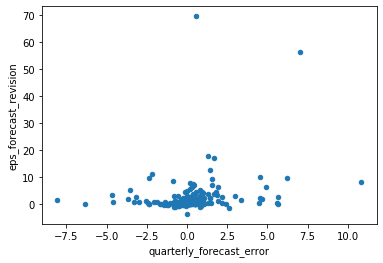

In [19]:
new_vars_df.plot.scatter(x = 'quarterly_forecast_error', y = 'eps_forecast_revision')

# Task 5

In [39]:
lines = []
with open(r"C:\Users\samas\Downloads\EDGAR Index 2020 Q2\form.idx") as f:
    lines = f.readlines()

In [48]:
with open(r"C:\Users\samas\Downloads\form.txt", 'w') as output:
    for row in lines:
        output.write(str(row) + '\n')

In [20]:
links = pd.read_excel(r"C:\Users\samas\Downloads\form.xlsx")

In [30]:
links.dropna(inplace = True)

In [33]:
links

,Form Type,Company Name,CIK,Date Filed,File Name
0,1-A,"Alt 5 Sigma, Inc.",1769312,2020-05-28,edgar/data/1769312/0001376474-20-000130.txt
2,1-A,"American Condor Resources, Corp",1754259,2020-05-28,edgar/data/1754259/0001754259-20-000002.txt
4,1-A,"American Condor Resources, Corp",1754259,2020-06-01,edgar/data/1754259/0001754259-20-000004.txt
6,1-A,Atlis Motor Vehicles Inc,1722969,2020-05-04,edgar/data/1722969/0001722969-20-000004.txt
8,1-A,Audition Showdown Inc.,1811091,2020-05-12,edgar/data/1811091/0001213900-20-011738.txt
...,...,...,...,...,...
530948,X-17A-5/A,MIDDLEMARCH SECURITIES LLC,1670763,2020-05-14,edgar/data/1670763/0001670763-20-000002.txt
530950,X-17A-5/A,"MVP FINANCIAL, LLC",1340915,2020-05-11,edgar/data/1340915/0001340915-20-000003.txt
530952,X-17A-5/A,"MVP FINANCIAL, LLC",1340915,2020-06-22,edgar/data/1340915/0001340915-20-000004.txt
530954,X-17A-5/A,SAMI BROKERAGE LLC,798377,2020-04-17,edgar/data/798377/0000798377-20-000002.txt


In [35]:
links = links.loc[links['Form Type'] == '10-Q']

In [37]:
links.reset_index(inplace = True)

In [38]:
from bs4 import BeautifulSoup
import requests

In [90]:
filed_dates = []
companyname = []
for i, row in links.iterrows():
    companyname.append(row['Company Name'])
    url = "https://www.sec.gov/Archives/" + row['File Name']
    html_content = requests.get(url, allow_redirects=True, headers={"User-Agent": "XYZ/3.0"}).content
    soup = BeautifulSoup(html_content, 'lxml') 
    results = soup.body.find(string=re.compile('.*{0}.*'.format("FILED AS OF DATE")), recursive=True)
    words = results.split()
    for index, word in enumerate(words):
        if word == 'DATE:':
            before = None
            after = words[index+1]
            filed_dates.append(after)

KeyboardInterrupt: 

The Code is for scraping the filed as of dates for each company. I do not have enough time to run it for all, so I am submitting the code and not the output, sorry for inconvinience

In [92]:
new_fundq.to_csv(r"C:\Users\samas\Downloads\Output_dataset.csv")